# D2 Mixing

Check if Harmony corrected embeddings of scATAC-seq and Multiome snATAC-seq are well mixed.

In [76]:
library(RANN)
library(ggplot2)
library(patchwork)

In [1]:
# Metadata file for scATAC + Multiome ATAC
atac_metaData = read.table("../../analysis/20220609_Multiome_SnapATAC/sessions/20220612_n13525/metadata.w.transfer.cluster.tsv", header = T, stringsAsFactor=F)
# atac_metaData = read.table("../20220609_Multiome_SnapATAC/metadata.no.harmony.tsv", header = T, stringsAsFactor=F)
rownames(atac_metaData) = paste(atac_metaData$sample, atac_metaData$barcode, sep='_')
atac_metaData$cells = rownames(atac_metaData)
dim(atac_metaData)
head(atac_metaData, 5)

[1] 13525    12

,barcode,TN,UM,PP,UQ,CM,cluster,umap1,umap2,sample,cells,transfered_cluster
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>
D1M_AAAAAAAAAAACATGCTATTAGCC,AAAAAAAAAAACATGCTATTAGCC,6736,6736,6736,6729,373,3,-0.4031222,-3.454888,D1M,D1M_AAAAAAAAAAACATGCTATTAGCC,3
D1M_AAAAAAAAAAACATGCTCACCCTC,AAAAAAAAAAACATGCTCACCCTC,28369,28369,28369,28339,2447,5,2.6643078,-3.955240,D1M,D1M_AAAAAAAAAAACATGCTCACCCTC,3
D1M_AAAAAAAAAAACATGCTTGAGAAC,AAAAAAAAAAACATGCTTGAGAAC,28635,28635,28635,28609,2201,1,-0.2071755,2.688192,D1M,D1M_AAAAAAAAAAACATGCTTGAGAAC,15
D1M_AAAAAAAAAAACCATGAACCTTGT,AAAAAAAAAAACCATGAACCTTGT,33869,33869,33869,33838,3018,5,3.1269215,-4.609105,D1M,D1M_AAAAAAAAAAACCATGAACCTTGT,3
D1M_AAAAAAAAAAACCATGAGCTTAAA,AAAAAAAAAAACCATGAGCTTAAA,18885,18885,18885,18867,1514,1,-0.1988264,1.998739,D1M,D1M_AAAAAAAAAAACCATGAGCTTAAA,15


In [58]:
day_config = read.table("../configs/multiome_day.tsv", comment.char = '', header=T)
day_config$colour = as.character(day_config$colour)
day_config$day = factor(day_config$day, levels=c("D1M", "D2M", "D2"))
rownames(day_config) = day_config$day
day_config

,day,colour
,<fct>,<chr>
D1M,D1M,#53a548
D2M,D2M,#6E3B4E
D2,D2,#FF70A6


In [18]:
orig_embed = read.table("../../analysis/20220609_Multiome_SnapATAC/sessions/20220612_n13525/features.no.harmony.50d.tsv")
dim(harmony_embed)
head(harmony_embed)

[1] 13525    10

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.005576098,-0.002994830,0.0011482085,-0.003059384,-0.001170932,-0.0008037389,0.0024473969,-0.004911566,-0.0041969047,0.0002239866
2,-0.006308342,-0.008630070,-0.0028624583,0.004450571,-0.001847188,-0.0020094749,-0.0015377454,0.007993754,-0.0016790453,0.0056897889
3,0.004459388,0.009549958,0.0048467639,0.006019882,0.011604946,-0.0008288198,-0.0005887825,-0.002238924,0.0083802568,-0.0051470898
4,-0.006604609,-0.006125785,0.0001448635,0.005928271,0.001567887,0.0007868336,-0.0022443680,0.009831894,0.0023044377,0.0020845937
5,-0.001395005,-0.001060266,0.0050842114,0.004684884,0.005441473,-0.0028520636,-0.0052392181,0.002862437,0.0075546200,0.0010427805
6,-0.005608135,-0.003738698,-0.0018120284,-0.003913790,-0.004106882,-0.0044972488,-0.0022040469,0.007827804,0.0007705526,0.0066312141


In [3]:
harmony_embed = read.table("../../analysis/20220609_Multiome_SnapATAC/sessions/20220612_n13525/features.harmony.10d.tsv")
dim(harmony_embed)
head(harmony_embed)

[1] 13525    10

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.005576098,-0.002994830,0.0011482085,-0.003059384,-0.001170932,-0.0008037389,0.0024473969,-0.004911566,-0.0041969047,0.0002239866
2,-0.006308342,-0.008630070,-0.0028624583,0.004450571,-0.001847188,-0.0020094749,-0.0015377454,0.007993754,-0.0016790453,0.0056897889
3,0.004459388,0.009549958,0.0048467639,0.006019882,0.011604946,-0.0008288198,-0.0005887825,-0.002238924,0.0083802568,-0.0051470898
4,-0.006604609,-0.006125785,0.0001448635,0.005928271,0.001567887,0.0007868336,-0.0022443680,0.009831894,0.0023044377,0.0020845937
5,-0.001395005,-0.001060266,0.0050842114,0.004684884,0.005441473,-0.0028520636,-0.0052392181,0.002862437,0.0075546200,0.0010427805
6,-0.005608135,-0.003738698,-0.0018120284,-0.003913790,-0.004106882,-0.0044972488,-0.0022040469,0.007827804,0.0007705526,0.0066312141


In [30]:
atac_metaData_d2_only = atac_metaData[atac_metaData$sample %in% c("D2", "D2M"), ]
orig_embed_d2_only = orig_embed[atac_metaData$sample %in% c("D2", "D2M"), 1:10]
harmony_embed_d2_only = harmony_embed[atac_metaData$sample %in% c("D2", "D2M"), ]

In [32]:
nn_orig = nn2(orig_embed_d2_only)

In [40]:
top5_ngb_d2m_orig = as.vector(nn_orig$nn.idx[atac_metaData_d2_only$sample=="D2M", 2:6])
table(atac_metaData_d2_only[top5_ngb_d2m_orig, "sample"])


   D2   D2M 
 2879 17926 

In [33]:
nn_harmony = nn2(harmony_embed_d2_only)

In [41]:
top5_ngb_d2m_harmony = as.vector(nn_harmony$nn.idx[atac_metaData_d2_only$sample=="D2M", 2:6])
table(atac_metaData_d2_only[top5_ngb_d2m_harmony, "sample"])


   D2   D2M 
 8885 11920 

In [42]:
table(atac_metaData_d2_only$sample)


  D2  D2M 
6147 4161 

In [46]:
data.frame(table(atac_metaData_d2_only[top5_ngb_d2m_orig, "sample"]))

Var1,Freq
<fct>,<int>
D2,2879
D2M,17926


In [84]:
YMAX = 18000

before = ggplot(data.frame(table(atac_metaData_d2_only[top5_ngb_d2m_orig, "sample"]))) + 
geom_bar(aes(x=Var1, y=Freq, fill=Var1), stat='identity') +
scale_fill_manual(values=day_config$colour[c(3,2)], name="Sample") + 
xlab("Sample of top 5 neighbor of Multiome snATAC-seq nuclei") +
ylab("Frequency") +
ggtitle("Before Harmony") +
ylim(c(0,YMAX)) +
theme_bw(base_size=16) +
theme(plot.title = element_text(hjust = 0.5))

after = ggplot(data.frame(table(atac_metaData_d2_only[top5_ngb_d2m_harmony, "sample"]))) + 
geom_bar(aes(x=Var1, y=Freq, fill=Var1), stat='identity') +
scale_fill_manual(values=day_config$colour[c(3,2)], name="Sample") + 
xlab("Sample of top 5 neighbor of Multiome snATAC-seq nuclei") +
ylab("Frequency") +
ggtitle("After Harmony") +
ylim(c(0,YMAX)) + 
theme_bw(base_size=16) +
theme(plot.title = element_text(hjust = 0.5))

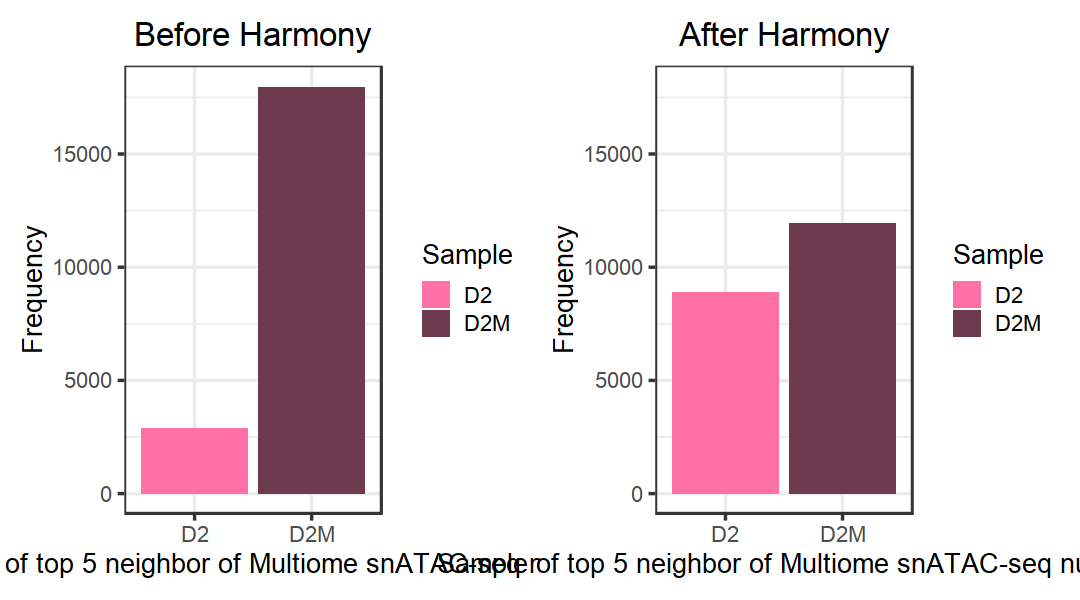

In [86]:
options(repr.plot.width = 9, repr.plot.height = 5)

p = before | after
p

In [88]:
ggsave("./subfigs/SuppHarmonyMixing.pdf", height=5, width=9, useDingbats=F)